## Metropolis-Hastings Sampler in Python

In [2]:
#import the necessary packages
import math
import numpy as np
from scipy.stats import gamma
from scipy.stats import norm
from random import random
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
#establish the sample size and constants
n = 1000
a, b = 2, 3
sig = math.sqrt(a*b**2)

In [4]:
#establish the x values as zeros, first value, and accepted
x = np.zeros((n, 1))
x[0]=2
accept = 0

In [5]:
for i in range(1, n):
    y = np.random.normal(x[i-1], sig)[0]
    u = random()
    alpha = np.min([1,
        (gamma.pdf(y, a=a, scale = b)*norm.pdf(x[i-1], y, sig)/(gamma.pdf(x[i-1], a=a, scale =b)*norm.pdf(y, x[i-1], sig)))[0]])
    if u <= alpha:
        x[i] = y
        accept += 1
    else:
        x[i] = x[i-1]

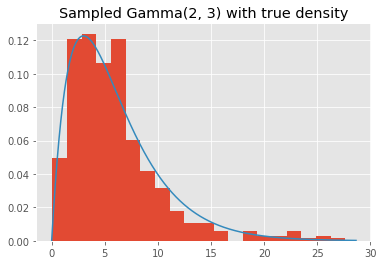

In [10]:
plt.hist(x, density=True, bins=20)
plt.title('Sampled Gamma(2, 3) with true density')
xx = np.linspace(0, max(x)+1, 1000)
plt.plot(xx, gamma.pdf(xx, a=a, scale=b))